In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
import re
import os
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 

## Get data from txt

In [2]:
# constant
train_positive_file_dir = 'aclImdb/train/pos'
train_negitive_file_dir = 'aclImdb/train/neg'

test_positive_file_dir = 'aclImdb/test/pos'
test_negitive_file_dir = 'aclImdb/test/neg'

train_unsup_file_dir = 'aclImdb/train/unsup'

In [10]:
def file_name(file_dir):   
    files_name = os.listdir(file_dir)
    return files_name

In [11]:
def save_name(file_dir, name):
    f = open(name + '.txt' ,'a')  # 'a' add not reset.
    
    files_name = file_name(file_dir)
    for i in files_name:        
        f.write(i)  # string
        f.write("\n") 

In [24]:
save_name(train_positive_file_dir, 'train_positive_file_dir')
save_name(train_negitive_file_dir, 'train_negitive_file_dir')

save_name(test_positive_file_dir, 'test_positive_file_dir')
save_name(test_negitive_file_dir, 'test_negitive_file_dir')

save_name(train_unsup_file_dir, 'train_unsup_file_dir')

In [3]:
def get_data(url):
    f = open(url +'.txt')
    file_names = []
    for i in f.readlines():
        file_names.append(i.replace("\n", ""))
    return file_names

In [4]:
def load_data(fileList, url):
    wordList = []
    sentenseList = []
    pa = string.punctuation
    for file in fileList:        
        with open(url +"/"+ file,errors='ignore') as f:
            ori_data = f.read().lower()
            data1 = re.sub('\n{2,6}','  ',ori_data)
            data2 = re.sub('\n',' ',data1)
            data3 = re.sub('  ','yxw ',data2)
            data4 = re.sub("[%s]+"%('"|#|$|%|&|\|(|)|*|+|-|/|<|=|>|@|^|`|{|}|~'), "", data3)
            sentense = re.sub("[%s]+"%('.|?|!|:|;'),'   ',data4)
            sentenseList.append(ori_data)
            word = re.sub("[%s]+"%(pa), " ", data3)
            wordList.extend(word.split())
    return sentenseList, wordList

In [5]:
file_names_train_pos = get_data('train_positive_file_dir')
file_names_train_neg = get_data('train_negitive_file_dir')

file_names_test_pos = get_data('test_positive_file_dir')
file_names_test_neg = get_data('test_negitive_file_dir')

file_names_train_unsup = get_data('train_unsup_file_dir')

In [6]:
# np.array
train_sentenseList1, wordList1 = load_data(file_names_train_pos, train_positive_file_dir) 
train_sentenseList2, wordList2 = load_data(file_names_train_neg, train_negitive_file_dir) 

test_sentenseList1, wordList3 = load_data(file_names_test_pos, test_positive_file_dir) 
test_sentenseList2, wordList4 = load_data(file_names_test_neg, test_negitive_file_dir) 
unsup_data_after_pre
train_unsup_sentenseList, wordList5 = load_data(file_names_train_unsup, train_unsup_file_dir) 
# train_data = np.array(sentenseList)
# sentenseList

In [7]:
train_target1 = np.array([1]*len(train_sentenseList1))
train_target2 = np.array([0]*len(train_sentenseList2))
train_target = np.append(train_target1,train_target2)

train_text1 = np.array(train_sentenseList1)
train_text2 = np.array(train_sentenseList2)
train_text = np.append(train_text1,train_text2)


test_target1 = np.array([1]*len(test_sentenseList1))
test_target2 = np.array([0]*len(test_sentenseList2))
test_target = np.append(test_target1,test_target2)

test_text1 = np.array(test_sentenseList1)
test_text2 = np.array(test_sentenseList2)
test_text = np.append(test_text1,test_text2)

train_unsup_target = np.array([0]*len(train_unsup_sentenseList))
train_unsup_text = np.array(train_unsup_sentenseList)


In [8]:
len(test_text)

25000

In [19]:
train_to_dict = {'content':train_text, 'target':train_target}
test_to_dict = {'content':test_text, 'target':test_target}
train_unsup_to_dict = {'content':train_unsup_text, 'target':train_unsup_target}

In [20]:
train_data = pd.DataFrame(data =train_to_dict, dtype=np.int8)
train_data.to_csv("train_data.csv",sep=',',index=False)

test_data = pd.DataFrame(data =test_to_dict, dtype=np.int8)
test_data.to_csv("test_data.csv",sep=',',index=False)

train_unsup_data = pd.DataFrame(data = train_unsup_to_dict, dtype=np.int8)
train_unsup_data.to_csv("unsup_data.csv",sep=',',index=False)

In [21]:
unsup_data_after_pre

## Stopword

In [74]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [75]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
train_data['content']=train_data['content'].apply(denoise_text)
test_data['content']=test_data['content'].apply(denoise_text)
unsup_data['content']=unsup_data['content'].apply(denoise_text)


In [76]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
train_data['content']=train_data['content'].apply(remove_special_characters)
test_data['content']=test_data['content'].apply(remove_special_characters)
unsup_data['content']=unsup_data['content'].apply(remove_special_characters)

In [77]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
train_data['content']=train_data['content'].apply(simple_stemmer)
test_data['content']=test_data['content'].apply(simple_stemmer)
unsup_data['content']=unsup_data['content'].apply(simple_stemmer)

In [78]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
train_data['content']=train_data['content'].apply(remove_stopwords)
test_data['content']=test_data['content'].apply(remove_stopwords)
unsup_data['content']=unsup_data['content'].apply(remove_stopwords)

{'did', 'such', 'doing', 'down', 'me', 'just', 'very', 'shan', 'against', 't', "you're", 'only', "haven't", 'yours', 'you', 'its', 'other', 'we', 'where', 'then', 'they', 'won', "you've", 'some', 've', 'y', 'each', "you'll", 'them', 'to', 'was', 'once', 'and', 'ain', 'under', 'through', 'for', "won't", 'mustn', 'a', 'are', 'that', 'at', 'why', 'any', 'nor', 'these', 'yourselves', 'has', 'here', "needn't", 'm', 'above', 'up', 'more', 'if', 'ma', 'didn', 'whom', 'can', 'have', 'an', 'should', 'no', 'there', 'couldn', 'her', 'how', 'of', 'doesn', "shouldn't", 'further', "wasn't", 'between', 'd', 'wouldn', 'his', 'being', 'do', 'when', 'hasn', "she's", 'by', "should've", 'into', 'aren', 'weren', 'as', 'needn', 'what', "it's", 'hadn', 'with', 'after', 'he', 'off', 'not', 'does', 'own', "weren't", "isn't", 'my', 'too', "wouldn't", 'been', 'again', 'same', 'few', "don't", 'our', 'myself', 'your', 'before', 'about', 'most', 'during', 'll', 'on', 'shouldn', 'is', 'out', "shan't", 'below', 'whic

In [81]:
train_data.head()

content  target
0  atlanti lost empir better movi thought never t...       1
1  wonder film version bestsel book smash broadwa...       1
2  sent prison less 10 40 year bust drug refus gi...       1
3  thi bar none hilari movi ever seen begin four ...       1
4  rather good movi americanis predict chang kung...       1

In [83]:
# train_data = pd.DataFrame(data =train_data, dtype=np.int8)
train_data.to_csv("train_data_after_pre.csv",sep=',',index=False)

# test_data = pd.DataFrame(data =test_data, dtype=np.int8)
test_data.to_csv("test_data_after_pre.csv",sep=',',index=False)

# train_unsup_data = pd.DataFrame(data = unsup_data, dtype=np.int8)
train_unsup_data.to_csv("unsup_data_after_pre.csv",sep=',',index=False)

In [84]:
train_data = pd.read_csv("train_data_after_pre.csv")
test_data = pd.read_csv("test_data_after_pre.csv")
unsup_data = pd.read_csv("unsup_data_after_pre.csv")

In [85]:
train_data['content'][1]

'wonder film version bestsel book smash broadway play live sadi bessi delani two africanamerican sister live age 100 told stori wit centuri american histori rubi dee diahann carrol give veri good perform bessi sadi respect ami madigan also good ami hill hearth white new york time report whose articl sister launch book etc mani flashback scene even mani presentday one veri power quit inspir book onli real drawback combin fact certain aspect stori present clearli interraci background sister mother whi father wa stern veri welldon excel perform power movi'

In [37]:
specific_wc = ['br', 'movie', 'film']
sw = list(set(stopwords.words('english')))
sw = sw + specific_wc

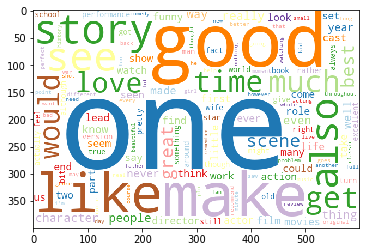

In [38]:
# word cloud on train reviews
wc_train = WordCloud(width = 600, height = 400, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10, colormap='Paired_r').generate(' '.join(train_text1[:100]))
plt.imshow(wc_train)
plt.savefig('train_data.jpg')

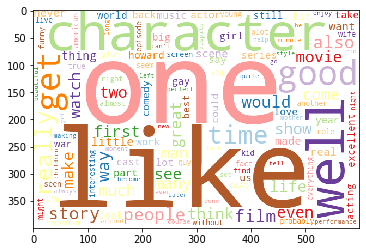

In [39]:
# word cloud on test reviews
wc_test = WordCloud(width = 600, height = 400, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10, colormap='Paired_r').generate(' '.join(test_text1[:100]))
plt.imshow(wc_test)
plt.savefig('test_data.jpg')

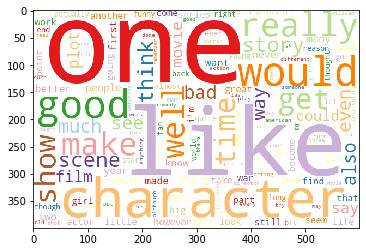

In [40]:
# word cloud on unsup reviews
wc_unsup = WordCloud(width = 600, height = 400, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10, colormap='Paired_r').generate(' '.join(train_unsup_text[:100]))
plt.imshow(wc_unsup)
plt.savefig('unsup_data.jpg')

In [59]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (25000, 4288039)
BOW_cv_test: (25000, 4288039)


In [1]:
import pandas as pd
import codecs
import re
from collections import Counter
from datetime import datetime


def bi_gram(sentence):
    result=[]
    word_list=sentence.split(" ") 
    bigram=''
    length_sentence=len(word_list)
    for i,word in enumerate(word_list):
        if i+2 <= length_sentence: #bi-gram
            bigram = "".join(word_list[i:i+2])
            word_i = bigram + ' '
            result.append(word_i)
    result=" ".join(result)
    return result

def tri_gram(sentence):
    result=[]
    word_list=sentence.split(" ") 
    trigram=''
    length_sentence=len(word_list)
    for i,word in enumerate(word_list):
        if i+3 <= length_sentence: #tri-gram
            trigram = "".join(word_list[i:i+3])
            word_i = trigram + ' '
            result.append(word_i)
    result=" ".join(result)
    return result

In [2]:
tmp_old = {}
tmp_new = {}

for i,item in train_data.iterrows():
    reviews = item['Reviews']
    bigram = re.split(r'  ',tri_gram(reviews))
    for w in bigram:
        if w not in tmp_old.keys():
            tmp_old[w] = 1
        else:
            tmp_old[w] += 1
            
print(len(tmp_old))

for key,value in tmp_old.items():
    if value >= 100:
        tmp_new[key] = value
print(len(tmp_new))
keys, values = np.split(sorted(tmp_new.items(), key=lambda e:e[1], reverse=True),[1],axis=1)
print(keys[:30])
print(values[:11])
values = values.reshape(len(values)).astype(np.int64)

NameError: name 'train_set' is not defined

In [3]:
import numpy as np
import pandas as pd
# from gensim.models import Word2Vec
import gensim

gg_model = gensim.models.KeyedVectors.load_word2vec_format('D:/lena/corpus/GoogleNews-vectors-negative300.bin',
                                                            binary=True)

NameError: name 'gensim' is not defined

In [5]:
def sentence2tokens(sentence):
    """
    Convert a string of sentence to a list of tokens. And the stopwords are removed.
    :param sentence:
    :return:
    """
    stoplist = set('for a of the and to in'.split())
    tokens = [word for word in sentence.split(" ") if (word not in stoplist)]
    return tokens
def sentence2vector(sentence, model):
    """
    Generate the vector of a sentence by averaging the vectors of the words.
    :param sentence:
    :param trained_model:
    :return:
    """
    tokens = sentence2tokens(sentence)
    try:
        vectors = model[tokens]
        return np.mean(vectors, axis=0)
    except:
        return None  #np.zeros(300)  # 300 is the length of a word embedding
    
def corpus2vector(corpus, model):
    """
    Generate the vector of the corpus by averaging the vectors of the sentences.
    :param corpus: list of sentences
    :param model: pre-trained model
    :return:
    """
    corpus_vectors = np.array([sentence2vector(sentence, model) for sentence in corpus])
    corpus_vectors = np.array([v for v in corpus_vectors if np.sum(v!=None)])  # remove the *None* element
    return np.mean(corpus_vectors, axis=0)

In [ ]:
ref_vector = corpus2vector(df_ts.text, gg_model)

In [6]:
import gensim
from gensim.models import word2vec

In [7]:
sentences = word2vec.Text8Corpus("/Users/faith/Documents/GitHub/text_classification/a01_FastText/sample.txt")
model = word2vec.Word2Vec(sentences,size=200)

model.save("/text.model")
model.save_word2vec_format("/text.model.bin",binary=True)

OSError: [Errno 30] Read-only file system: '/text.model'

In [8]:
vector = model.wv['movie'] 

KeyError: "word 'movie' not in vocabulary"

In [9]:
#交换位置
def swap(a,b):
    temp=a
    a=b
    b=temp
    return a,b

#随机交换
def random_exchange(sentence):
    english_punctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%', '<','>','/','..']
    text = nltk.word_tokenize(sentence.lower())
    text_list = [word for word in text if word not in english_punctuations]
    #get index
    index = []
    for key,value in enumerate(text_list):
        index.append(key)
        
    ran = random.sample(index,2)
    
    a=ran[0]
    b=ran[1]
    #swap(text[a],text[b])
    temp=text_list[a]
    text_list[a]=text_list[b]
    text_list[b]=temp
    return text_list

#随机删除    
def random_delete(sentence):
    english_punctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%', '<','>','/','..']
    text = nltk.word_tokenize(sentence.lower())
    text_list = [word for word in text if word not in english_punctuations]
    delete_word = choice(text_list)
    text_list.remove(delete_word)
    return text_list

#同义词替换
def synonym_replace(word):
    synonym = wn.synsets(word)
    return synonym

#根据词向量距离获取同义词
def get_most_similar_list(string1):
    # 使用模型
    result = ' '
    similar_list = []
    try:
        items = gg_model.most_similar(string1, topn=5)
        for i, j in items:
            similar_list.append(i)
        #print(result)
    except:
        pass

    return similar_list

#生成随机数
def genernate_random (sentence):
    english_punctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%', '<','>','/','..']
    text = nltk.word_tokenize(sentence.lower())
    text = [word for word in text if word not in english_punctuations]
    text_list =  [w for w in text if(w not in stopwords.words('english'))]
    #get index
    index = []
    for key,value in enumerate(text_list):
        index.append(key)
    ran = random.sample(index,1)
    
    return ran



In [10]:
gg_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/faith/Downloads/WHB/data/GoogleNews-vectors-negative300.bin', binary=True)

KeyboardInterrupt: 

In [ ]:
###### text = 'wonder film version bestsel book smash broadway play live sadi bessi delani two africanamerican sister live age 100 told stori wit centuri american histori rubi dee diahann carrol give veri good perform bessi sadi respect ami madigan also good ami hill hearth white new york time report whose articl sister launch book etc mani flashback scene even mani presentday one veri power quit inspir book onli real drawback combin fact certain aspect stori present clearli interraci background sister mother whi father wa stern veri welldon excel perform power movi'

In [1]:
#Delete characters randomly随机删除
for i in range(5):
        new_corpus = " "
        new_list = random_delete(text)  
        for j in new_list:
            new_corpus = new_corpus+str(j)+" "

In [2]:
#Find synonyms and replace寻找同义词并替换

for i in range(5):
    new_corpus = " "
    new_list = random_exchange(text)   
    for j in new_list:
        new_corpus = new_corpus+str(j)+" "
    print(new_corpus)

NameError: name 'synonym_replace' is not defined